In [1]:
from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
!kaggle datasets download -d singhdatascientist/for-image-classification-of-cheetah-vs-hyena

100% 153M/154M [00:02<00:00, 64.3MB/s]
100% 154M/154M [00:02<00:00, 56.8MB/s]


In [3]:
!unzip "/content/for-image-classification-of-cheetah-vs-hyena.zip"

Archive:  /content/for-image-classification-of-cheetah-vs-hyena.zip
  inflating: train/cheetah/cheetah_000_resized.jpg  
  inflating: train/cheetah/cheetah_001_resized.jpg  
  inflating: train/cheetah/cheetah_002_resized.jpg  
  inflating: train/cheetah/cheetah_003_resized.jpg  
  inflating: train/cheetah/cheetah_004_resized.jpg  
  inflating: train/cheetah/cheetah_005_resized.jpg  
  inflating: train/cheetah/cheetah_006_resized.jpg  
  inflating: train/cheetah/cheetah_007_resized.jpg  
  inflating: train/cheetah/cheetah_008_resized.jpg  
  inflating: train/cheetah/cheetah_009_resized.jpg  
  inflating: train/cheetah/cheetah_010_resized.jpg  
  inflating: train/cheetah/cheetah_011_resized.jpg  
  inflating: train/cheetah/cheetah_012_resized.jpg  
  inflating: train/cheetah/cheetah_013_resized.jpg  
  inflating: train/cheetah/cheetah_014_resized.jpg  
  inflating: train/cheetah/cheetah_015_resized.jpg  
  inflating: train/cheetah/cheetah_016_resized.jpg  
  inflating: train/cheetah/chee

In [4]:
import tensorflow as tf
train_dir = '/content/train'
test_dir = '/content/validation'

In [5]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224,224),
    batch_size=32,
    label_mode='int'
)

Found 1800 files belonging to 2 classes.


In [6]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224,224),
    batch_size=32,
    label_mode='int'
)

Found 200 files belonging to 2 classes.


In [7]:
num_classes= 2

In [8]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32
)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy:', accuracy)

Found 1800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Epoch 1/5
57/57 [==============================] - 108s 2s/step - loss: 0.8311 - accuracy: 0.5861 - val_loss: 0.4965 - val_accuracy: 0.8050
Epoch 2/5
57/57 [==============================] - 113s 2s/step - loss: 0.4519 - accuracy: 0.8056 - val_loss: 0.3869 - val_accuracy: 0.8500
Epoch 3/5
57/57 [==============================] - 99s 2s/step - loss: 0.3519 - accuracy: 0.8506 - val_loss: 0.2908 - val_accuracy: 0.9050
Epoch 4/5
57/57 [==============================] - 105s 2s/step - loss: 0.2734 - accuracy: 0.8978 - val_loss: 0.4412 - val_accuracy: 0.8150
Epoch 5/5
7/7 [==============================] - 4s 444ms/step - loss: 0.2448 - accuracy: 0.9050
Test accuracy: 0.9049999713897705


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

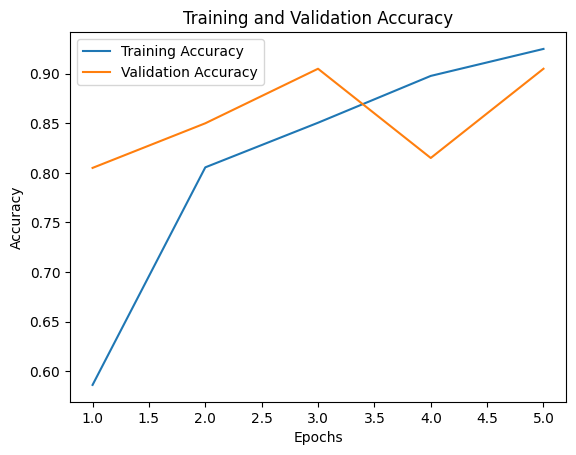

In [10]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation accuracy over epochs
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

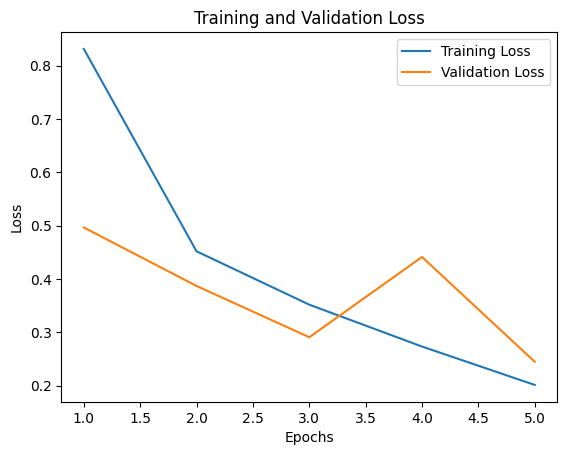

In [11]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**LeNet**

In [12]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
loss_le, accuracy_le = model.evaluate(test_images, test_labels)
print('Test Loss:', loss_le)
print('Test accuracy:', accuracy_le)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 28s 28ms/step - loss: 0.2350 - accuracy: 0.9305 - val_loss: 0.0839 - val_accuracy: 0.9716
Epoch 2/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0746 - accuracy: 0.9768 - val_loss: 0.0576 - val_accuracy: 0.9815
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.0410 - val_accuracy: 0.9865
Epoch 4/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0432 - val_accuracy: 0.9845
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0328 - accuracy: 0.9884
Test Loss: 0.032820362597703934
Test accuracy: 0.9883999824523926


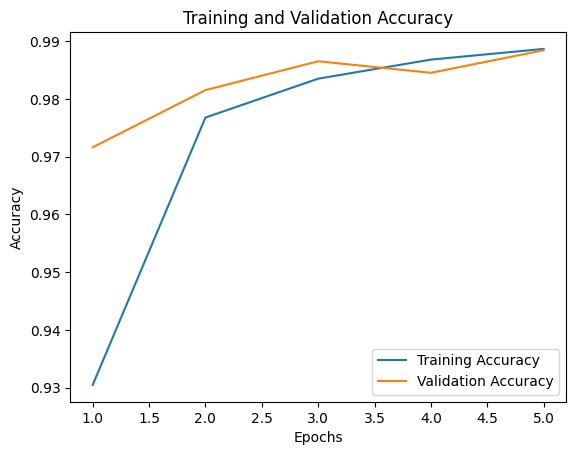

In [13]:
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Alex Net**

In [15]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
loss_alex, accuracy_alex = model.evaluate(test_images, test_labels)
print('Test Loss:', loss_alex)
print('Test accuracy:', accuracy_alex)



Epoch 1/5
938/938 [==============================] - 55s 57ms/step - loss: 0.4306 - accuracy: 0.8659 - val_loss: 0.0711 - val_accuracy: 0.9770
Epoch 2/5
938/938 [==============================] - 52s 56ms/step - loss: 0.1473 - accuracy: 0.9614 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 52s 55ms/step - loss: 0.1099 - accuracy: 0.9716 - val_loss: 0.0418 - val_accuracy: 0.9872
Epoch 4/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0890 - accuracy: 0.9768 - val_loss: 0.0379 - val_accuracy: 0.9892
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0343 - accuracy: 0.9905
Test Loss: 0.03427353501319885
Test accuracy: 0.9904999732971191


In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

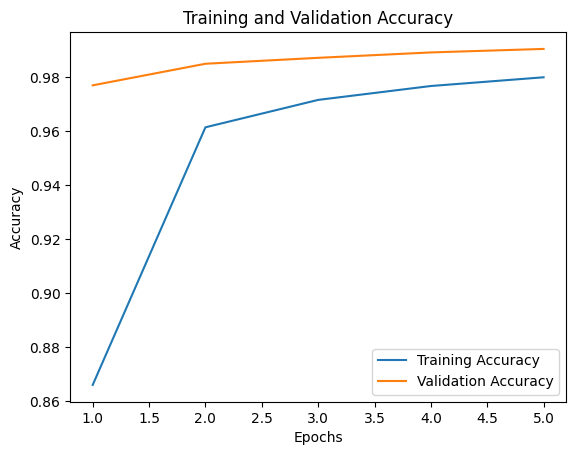

In [17]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation accuracy over epochs
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
import matplotlib.pyplot as plt

accuracies = [accuracy, accuracy_le, accuracy_alex]
models = ['CNN', 'Le Net', 'AlexNet']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])

plt.title('Comparison of Accuracies for the Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [19]:
import matplotlib.pyplot as plt

losses = [loss, loss_le, loss_alex]
models = ['CNN', 'Le Net', 'AlexNet']

plt.figure(figsize=(10, 6))
plt.bar(models, losses, color=['blue', 'orange', 'green'])

plt.title('Comparison of Losses for the Models')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()
